# Predict future sales

**Geçmiş verilere bakarak farklı shop-item pairs için önümüzdeki ay satışlarını tahmin edecek bir model hazırlanacak.**


## 1 - Paketler ##

**Öncelikle gerekli paketleri import edelim:**

In [291]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense,Dropout 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv


## 2 - Data ##

**Kullanılacak verileri çekelim:**

In [292]:
items = pd.read_csv('../input/competitive-data-science-predict-future-sales/items.csv')
shops = pd.read_csv('../input/competitive-data-science-predict-future-sales/shops.csv')
train = pd.read_csv('../input/competitive-data-science-predict-future-sales/sales_train.csv')
test  = pd.read_csv('../input/competitive-data-science-predict-future-sales/test.csv')
print('Done')

Done


## 3 - Satış Performansları ##

Bu kısımda her shop ve her item için ayrı ayrı tüm zamanlar satış performansları elde edilecek.

**Shop Performansı**
- 60 shop'un her biri için 34 aylık satış performansı elde edilecek, ilgili shop'un bir aylık satış değeri mağazının o ay toplam kaç satış yaptığını gösterir, toplamda 2040 satırımız olacak.

**Item Performansı**
- Her item için 34 aylık satış performansı elde edilecek, ilgili item'ın bir aylık satış değeri o ürünün ay içinde tüm mağazalarda kaç adet satıldığını gösteriyor.

In [293]:
#Shop performansı

N = len(train.date_block_num.unique()) #Toplam unique date_block_num sayısı
M = len(train.shop_id.unique())        #Toplam unique shop sayısı

shop_list = [el for el in np.arange(M) for i in range(N)] 
date_list = [item for item in range(N)]*M
count_list = [0]*N*M

df = pd.DataFrame(list(zip(shop_list, date_list, count_list)),columns =['shop_id','date_block_num', 'count']) 
grouped = pd.DataFrame(train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())


merged = pd.merge(df,grouped,on=['shop_id','date_block_num'],how='left')
merged.fillna(0,inplace = True)
all_time_shops_perf = merged.drop(columns=['count'])

print(all_time_shops_perf.shape)
all_time_shops_perf.head(35)

(2040, 3)


,shop_id,date_block_num,item_cnt_day
0,0,0,5578.0
1,0,1,6127.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
5,0,5,0.0
6,0,6,0.0
7,0,7,0.0
8,0,8,0.0
9,0,9,0.0


In [294]:
#Item performansı
N = len(train.date_block_num.unique()) #Toplam unique date_block_num sayısı
I = len(train.item_id.unique())        #Toplam unique item sayısı

item_list = [el for el in np.arange(I) for i in range(N)] 
date_list = [item for item in range(N)]*I
count2_list = [0]*N*I

df2 = pd.DataFrame(list(zip(item_list, date_list, count2_list)),columns =['item_id','date_block_num', 'count'])
grouped2 = pd.DataFrame(train.groupby(['item_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())

merged = pd.merge(df2,grouped2,on=['item_id','date_block_num'],how='left')
merged.fillna(0,inplace = True)
all_time_items_perf = merged.drop(columns=['count'])

print(all_time_items_perf.shape)
all_time_items_perf.head(35)

(741438, 3)


,item_id,date_block_num,item_cnt_day
0,0,0,0.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
5,0,5,0.0
6,0,6,0.0
7,0,7,0.0
8,0,8,0.0
9,0,9,0.0


## 4 - Satış Performansları - Pivot Table ##

   **Bu kısımda öncelikle, pivot table kullanılarak training sette verilen her bir shop-item pair için 34 aylık satış performansı elde edilecek. Daha sonra, 3. kısımda elde edilen shop ve item performansları da pivot table ile daha kullanışlı bir forma taşınacak.**


In [295]:
#Pivot table ile 33 ay için ilgili shoptaki ilgili itemların performansını elde edelim:
shop_item_pair_perf = train.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')
shop_item_pair_perf.reset_index(inplace = True)
#Benzer şekilde 33 ay için shops performansını pivot table'a çevirelim:
shops_perf = all_time_shops_perf.pivot_table(index = ['shop_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0)
shops_perf.reset_index(inplace = True)
#Benzer şekilde 33 ay için items performansını pivot table'a çevirelim:
items_perf = all_time_items_perf.pivot_table(index = ['item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0)
items_perf.reset_index(inplace = True)

print(shop_item_pair_perf.shape,shops_perf.shape,items_perf.shape)

(424124, 36) (60, 35) (21807, 35)


In [296]:
shop_item_pair_perf.head()

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [297]:
shops_perf.head()

shop_id item_cnt_day                                           \
date_block_num                    0     1     2    3     4     5     6     7   
0                    0         5578  6127     0    0     0     0     0     0   
1                    1         2947  3364     0    0     0     0     0     0   
2                    2         1146   488   753  583   553   832   807   875   
3                    3          767   798   959  647   710   784   721   890   
4                    4         2114  2025  2060  285  1211  1464  1378  1713   

                      ...                                                     
date_block_num     8  ...    24   25   26   27   28   29   30   31   32   33  
0                  0  ...     0    0    0    0    0    0    0    0    0    0  
1                  0  ...     0    0    0    0    0    0    0    0    0    0  
2                945  ...   987  907  762  859  843  804  785  942  822  727  
3               1026  ...   977  738  741  740  731  672  535  666  745  613  
4               1536  ...  1188  980  978  899  893  793  842  947  732  831  

[5 rows x 35 columns]

In [298]:
items_perf.head()

item_id item_cnt_day                          ...              \
date_block_num                    0  1  2  3  4  5  6  7  8  ... 24 25 26 27   
0                    0            0  0  0  0  0  0  0  0  0  ...  0  0  0  0   
1                    1            0  0  0  0  0  0  0  0  0  ...  0  0  0  0   
2                    2            0  0  0  0  0  0  0  0  0  ...  0  0  0  0   
3                    3            0  0  0  0  0  0  0  0  0  ...  0  0  0  0   
4                    4            0  0  0  0  0  0  0  0  0  ...  0  0  0  0   

                                  
date_block_num 28 29 30 31 32 33  
0               0  0  0  0  0  0  
1               0  0  0  0  0  0  
2               0  0  0  0  0  0  
3               0  0  0  0  0  0  
4               0  0  0  0  0  0  

[5 rows x 35 columns]

## 5 - Satış Performansları - Merge ##

   **Önceki kısımdaki 3 tabloyu merge edeceğiz, training setteki her shop-item pair için 34 aylık satış verisinin yanında ilgili shop'un ve ilgili item'ın 34 aylık genel performansı da aynı satıra eklenecek. **

In [299]:
dataset = pd.merge(shop_item_pair_perf,shops_perf,on='shop_id',how='left')
dataset = pd.merge(dataset, items_perf,on='item_id',how='left')
dataset.fillna(0,inplace = True)
dataset.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


shop_id item_id item_cnt_day_x                        ...  \
date_block_num                              0   1  2  3  4  5  6  7  ...   
0                    0      30              0  31  0  0  0  0  0  0  ...   
1                    0      31              0  11  0  0  0  0  0  0  ...   
2                    0      32              6  10  0  0  0  0  0  0  ...   
3                    0      33              3   3  0  0  0  0  0  0  ...   
4                    0      35              1  14  0  0  0  0  0  0  ...   

               item_cnt_day                                                  \
date_block_num           24    25    26    27    28    29    30    31    32   
0                      14.0  14.0   5.0   4.0   5.0   4.0   4.0   6.0   3.0   
1                      25.0  13.0  12.0  13.0   5.0  10.0   6.0  53.0   9.0   
2                      42.0  32.0  40.0  20.0  20.0  26.0  21.0  30.0  19.0   
3                      19.0  26.0  20.0  13.0  12.0  11.0  15.0  14.0  16.0   
4                       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                      
date_block_num    33  
0                1.0  
1               18.0  
2               22.0  
3               16.0  
4                0.0  

[5 rows x 104 columns]

## 6 - Inputlara Karar Verme##

Bu noktada elimizde training setteki her shop-item pair için 102 satış verisi var, bu 102 verinin farklı varyasyonlarını input olarak kullanmak mümkün. Bazı opsiyonlardan bahsedelim:

**Tüm zamanlar yaklaşımı:**
- Son 33 aylık shop-item pair satış verisini kullanarak 34. ayın satışını tahmin edebiliriz. **[33 input]**
- Son 33 aylık shop-item pair satış verisinin yanında 33 aylık shop performansı ve 33 aylık item performansı verilerini de kullanarak ve 34. ay satışını tahmin edebiliriz. **[99 input]**
- Son 33 aylık shop-item pair satış verisinin yanında tahmin edilecek ayın geçmiş iki yıldaki shop ve item performans verilierini kullanarak 34. ay satışını tahmin edebiliriz. **[37 input]**

- **Yaklaşımın olası problemi:** Eğitim için 33 ay ile 34. ayı yani Ekim'i tahmin etmek durumunda kalıyoruz, buna karşın gerçekte tahmin edilecek ay 35. ay yani Kasım, bu durumda model Kasım ayını tahmin etmek istese de Ekim ayı için eğitildiği için test setindeki hata validation set'e göre daha yüksek olabilir.

**Yıllık yaklaşım:**
- Her yıl için geçmiş 10 ay (Ocak-Ekim) satış verisine bakarak 11. ay (Kasım) satışlarını tahmin et. Bunu yaparsak, geçmiş iki yılın verilerini birbirine ekleyip veri sayımızı ikiye katlayabiliriz. **[10 input]**

- Son olarak da geçmiş 10 ay satış verisine ek olarak 10 aylık shop ve item performanslarını da ekleyerek 11. ay'ı tahmin edebiliriz. **[30 input]**

**Karar:**
- 33 input ve 10 input durumlarını shop'un veya item'ın overall satış performanslarını gözetmediği için kullanmak istemiyorum.
- 99 input iyi çalışabilecek olsa da modeli eğitmek daha zor olacağı için onu da eliyorum.
- Geriye 37 ve 30 input durumları kaldı, ikisi de iyi sonuç verebilir, ancak 37 input durumunda CV error'a tam olarak güvenemeyecek olduğum için 30 input durumuyla yola devam edeceğim.

## 7 - Training ve Test Verilerimizi Hazırlayalım (30 input)##

**Her shop-item pair için geçmiş 10 aylık (Ocak-Ekim) satış verisinin yanında 10 aylık shop ve item overall performans verileri de kullanılacak ve 30 input elde edilecek. 30 input için modelin amacı, Kasım ayı satış değerini tahmin etmek.**

In [300]:
#Training Set
year1X = dataset.iloc[:,list(range(2,12))+list(range(36,46))+list(range(70,80))]
year2X = dataset.iloc[:,list(range(14,24))+list(range(48,58))+list(range(82,92))]
X = np.concatenate((year1X.values, year2X.values), axis=0)

year1Y = dataset.iloc[:,[12]]
year2Y = dataset.iloc[:,[24]]
Y = np.concatenate((year1Y.values, year2Y.values), axis=0)

#Competition açıklaması gereğince outputumuzu clip ediyoruz.
Y = np.clip(Y, 0, 20)

print(X.shape,Y.shape)

(848248, 30) (848248, 1)


In [301]:
#Test Set
data_test = pd.merge(test, dataset, on=['shop_id','item_id'], how='left')
data_test = data_test.fillna(0)

X_test = data_test.iloc[:,list(range(27,37))+list(range(61,71))+list(range(95,105))]
print(X_test.shape)

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


(214200, 30)


## 8 - Feature Scaling & Split##

**Eğitim için train ve test setlerine scaling uygulayacağım ve ardından train setimi bölerek bir validation set elde edeceğim.**

In [302]:

#Feature Scaling
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_test = min_max_scaler.transform(X_test)

#Train Validation Split
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.03)
print('Done')

Done


## 9 - Model ve Eğitim##

- Model olarak dropout regularization ile standart bir deep neural network yapısı kullanacağım.
- Loss function olarak MSE ve optimizer olarak Adam kullanacağım
- Grid search ile hyperparameter tune etmek daha iyi sonuçlar sağlayacaktır, ancak uzun zaman alacağı için kullanmayacağım. Bunun yerine bir kaç deneme yanılma ile ortalama bir performans sağlayan bir yapı kullanacağım.

In [307]:

model = Sequential()
model.add(Dense(50, input_dim=30, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(80, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="relu"))
model.summary() 
 
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["accuracy"])

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_104 (Dense)            (None, 50)                1550      
_________________________________________________________________
dropout_64 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_105 (Dense)            (None, 80)                4080      
_________________________________________________________________
dropout_65 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 81        
Total params: 5,711
Trainable params: 5,711
Non-trainable params: 0
_________________________________________________________________


In [308]:
history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv),epochs=150, batch_size=512, verbose=2, shuffle=False)

Train on 822800 samples, validate on 25448 samples
Epoch 1/150
 - 6s - loss: 1.2499 - accuracy: 0.8405 - val_loss: 1.1252 - val_accuracy: 0.8850
Epoch 2/150
 - 6s - loss: 1.1236 - accuracy: 0.8561 - val_loss: 1.0619 - val_accuracy: 0.8871
Epoch 3/150
 - 6s - loss: 1.0761 - accuracy: 0.8670 - val_loss: 0.9969 - val_accuracy: 0.8861
Epoch 4/150
 - 6s - loss: 1.0534 - accuracy: 0.8684 - val_loss: 0.9896 - val_accuracy: 0.8844
Epoch 5/150
 - 6s - loss: 1.0350 - accuracy: 0.8695 - val_loss: 0.9735 - val_accuracy: 0.8851
Epoch 6/150
 - 6s - loss: 1.0256 - accuracy: 0.8700 - val_loss: 0.9642 - val_accuracy: 0.8825
Epoch 7/150
 - 6s - loss: 1.0246 - accuracy: 0.8700 - val_loss: 0.9532 - val_accuracy: 0.8829
Epoch 8/150
 - 6s - loss: 1.0131 - accuracy: 0.8706 - val_loss: 0.9641 - val_accuracy: 0.8839
Epoch 9/150
 - 6s - loss: 1.0073 - accuracy: 0.8712 - val_loss: 0.9526 - val_accuracy: 0.8832
Epoch 10/150
 - 6s - loss: 1.0031 - accuracy: 0.8706 - val_loss: 0.9589 - val_accuracy: 0.8824
Epoch 11

Epoch 87/150
 - 6s - loss: 0.9550 - accuracy: 0.8731 - val_loss: 0.8919 - val_accuracy: 0.8765
Epoch 88/150
 - 6s - loss: 0.9554 - accuracy: 0.8736 - val_loss: 0.8903 - val_accuracy: 0.8785
Epoch 89/150
 - 6s - loss: 0.9525 - accuracy: 0.8734 - val_loss: 0.9028 - val_accuracy: 0.8803
Epoch 90/150
 - 6s - loss: 0.9540 - accuracy: 0.8734 - val_loss: 0.8969 - val_accuracy: 0.8779
Epoch 91/150
 - 6s - loss: 0.9531 - accuracy: 0.8736 - val_loss: 0.8882 - val_accuracy: 0.8751
Epoch 92/150
 - 6s - loss: 0.9550 - accuracy: 0.8729 - val_loss: 0.8919 - val_accuracy: 0.8796
Epoch 93/150
 - 6s - loss: 0.9533 - accuracy: 0.8738 - val_loss: 0.8906 - val_accuracy: 0.8763
Epoch 94/150
 - 6s - loss: 0.9536 - accuracy: 0.8734 - val_loss: 0.8901 - val_accuracy: 0.8761
Epoch 95/150
 - 6s - loss: 0.9541 - accuracy: 0.8731 - val_loss: 0.8908 - val_accuracy: 0.8739
Epoch 96/150
 - 6s - loss: 0.9519 - accuracy: 0.8735 - val_loss: 0.8920 - val_accuracy: 0.8770
Epoch 97/150
 - 6s - loss: 0.9535 - accuracy: 0.87

## 10 - Sonuçlar##

- Training ve Validation hatalarımıza bakalım, loss function olarak MSE kullandık, yarışmada RMSE kullanılıyor
- Sonucu yarışmaya yüklemeden önce prediction'ı 0-20 arasına clip ediyoruz.



In [309]:
#RMS Score
score, acc = model.evaluate(X_cv, y_cv)
print(np.sqrt(score))

25448/25448 [==============================] - 1s 25us/step
0.9433987502128722


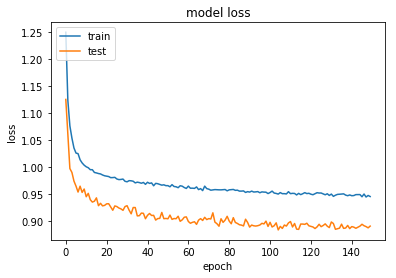

In [310]:
#History
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

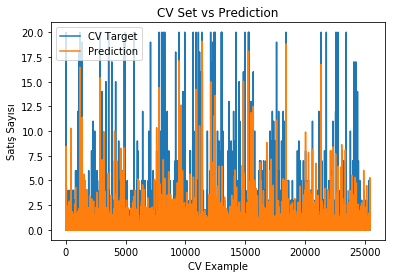

In [313]:
#CV data plot
plt.plot(range(len(y_cv)),y_cv)
plt.plot(range(len(y_cv)),model.predict(X_cv))
plt.title('CV Set vs Prediction')
plt.ylabel('Satış Sayısı')
plt.xlabel('CV Example')
plt.legend(['CV Target', 'Prediction'], loc='upper left')

- Eğitim süresi uzatılarak  veya grid search hyperparameter tuning ile sonuçlar iyileştirilebilir.
- Dropout regularization kullandığımız için validation hatasının,training hatasından düşük çıkması kabul edilebilir, çünkü dropout, prediction yaparken kullanılmıyor, bu sebeble prediction yaparken model training'e göre daha iyi performans sergileyebilir.
- Yine de bu modelle elde edilen skor 1.04 (rmse) yarışma birincisinin skoru yaklaşık 0.76. Bu değeri elde etmek için, farklı dataların ve/veya farklı NN yapılarının kullanılması gerekebilir.